<a href="https://colab.research.google.com/github/siabang35/Classification-4-Animal/blob/choice/UP_CV_Wildan_Assyidiq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Nama : Wildan Assyidiq
###Kelas : Goldfab
### Domain : Computer Vision

# 1. Importing packages
Mengimpor Library yang akan digunakan diantaranya yaitu seperti tensorflow, numpy, pandas, seaborn, matplotlib, open cv2, random dan os

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import random
import os

from tensorflow.keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/4-animal'

# 2. Visualising data
Dataset akan dilakukan visualisasi gambarnya dengan dataframe-nya berupa gambar bagian head untuk ditampilkan, lalu dilakukan eksplorasi dataset gambar berupa data train, jumlah dataset gambar masing-masing dari 4 jenis hewan dan total keseluruhan data gambar. Kemudian tampilkan atau visualisasikan gambar dengan bar plot dan pada bagian atas(head) gambar-gambar 4 jenis hewan dengan matplotlib menjadi satu classes

In [ ]:
names = []
nums = []
data = {'Name of class':[],'Number of samples':[]}

for i in os.listdir(path+'/train'):
    nums.append(len(os.listdir(path+'/train/'+i)))
    names.append(i)

data['Name of class']+=names
data['Number of samples']+=nums

df = pd.DataFrame(data)
df

,Name of class,Number of samples
0,deer,600
1,horse,600
2,cat,700
3,dog,900


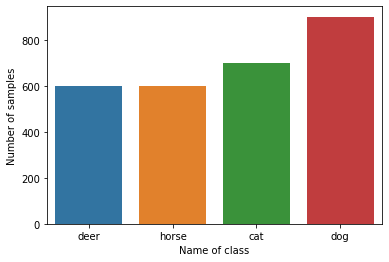

In [ ]:
sns.barplot(x=df['Name of class'],y=df['Number of samples'])

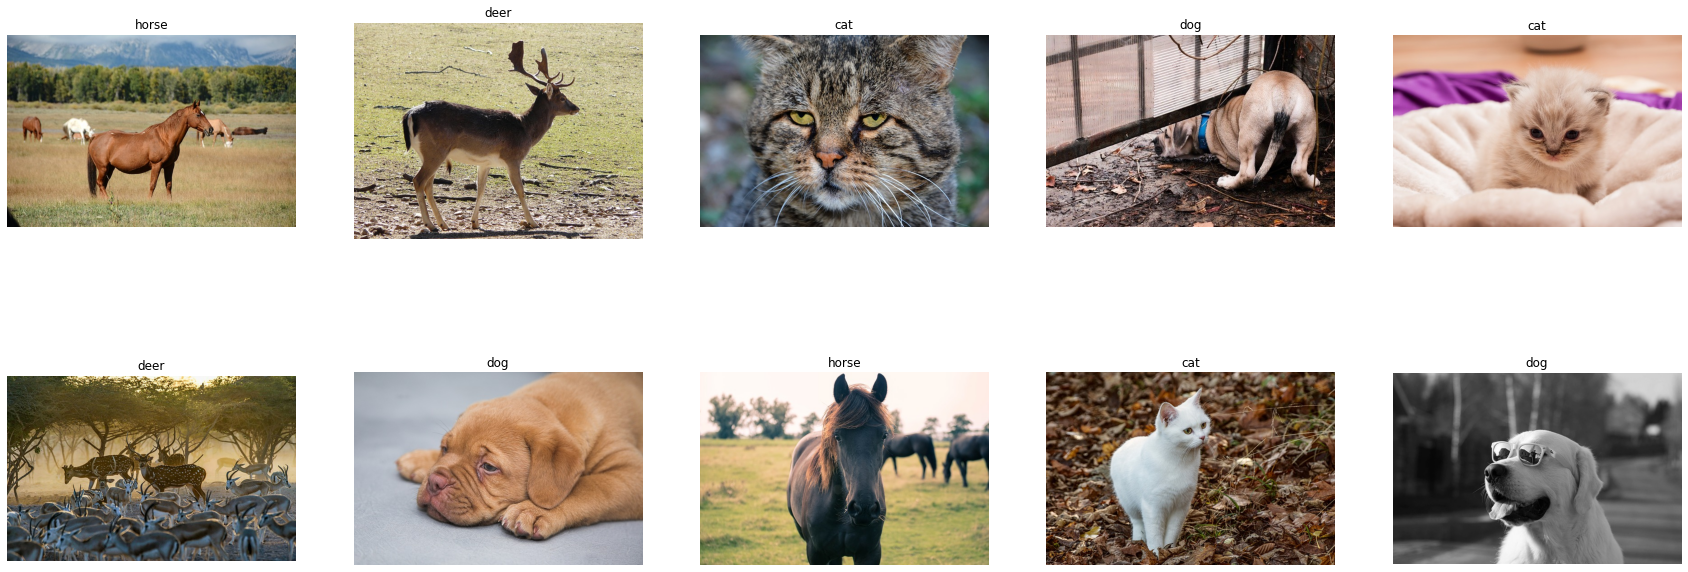

In [ ]:
classes = os.listdir(path+'/train')

plt.figure(figsize=(30 , 30))
for x in range(10):
    i = random.randint(0,3)                    # getting the class
    images = os.listdir(path+'/train'+'/'+classes[i])
    j = random.randint(0,600)                  # getting the image
    image = cv2.imread(path+'/train'+'/'+classes[i]+'/'+images[j])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = plt.subplot(5, 5, x + 1)
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis("off")

plt.show()

# 3. Preparing the data
Mempersiapkan data sebagai data image preprocessing, yang akan digunakan sebagai training dan validation data gambar, mengatur path,rotation range, validation split, batch size = 32 dan tampilkan total images yang ditemukandari 4 classes atau 4 klasifikasi hewan horse, cat, dog, dan deer

In [ ]:












image_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255 , rotation_range=20,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                horizontal_flip=True, validation_split=0.2)

In [ ]:
train_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='training',
        target_size=(224 , 224),
        batch_size=32)

val_ds = image_datagen.flow_from_directory(
        path+'/train',
        subset='validation',
        target_size=(224 , 224),
        batch_size=32)

Found 2240 images belonging to 4 classes.
Found 560 images belonging to 4 classes.


# 4. Building the model
Membangun model yang akan digunakan, disini menggunakan inception v3 dengan 2 ekstra layer dense. Menggunakan model sequential, mobilenet, GlobalAveragePooling2D dan Flatten, untuk aktivasi menggunakan Tanhiperbolic dan softmax, selanjutnya mengatur nilai learning rate dan momentumnya.

In [ ]:
# i'll be using inception_v3 for this model , along with 2 extra dense layers and the output layer

mobilenet = tf.keras.applications.mobilenet.MobileNet(input_shape=(224 , 224, 3),
                                           include_top=False,
                                         weights='imagenet')

model = Sequential()
model.add(mobilenet)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(2048, activation="tanh"))
model.add(Dense(1024, activation="tanh"))
model.add(Dense(4, activation="softmax" , name="classification"))

In [ ]:
fold = 1
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.002,momentum=0.9), 
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_3 (Dense)             (None, 1024)              2098176   
                                                                 
 classification (Dense)      (None, 4)                

# 5. Training and evaluating
Melakukan training pada data train dan validation data dengan dengan banyak iterasi, memanfaatkan teknik Konvolusi yaitu CNN, yang akan ditentukan untuk mendapatkan tingkat akurasi yang tinggi dan loss yang lebih rendah tentunya. Selanjutnya evaluasi model yang digunakan untuk mengukur seberapa bagus dan akurat model yang digunakan dan dilakukan plotting hasil evaluasi model untuk loss, val_loss dan accuracy, val accuracy dilihat pola grafiknya

In [ ]:
history = model.fit(train_ds , validation_data = val_ds , epochs = 25)

Epoch 1/25
70/70 [==============================] - 1183s 17s/step - loss: 0.4594 - accuracy: 0.8165 - val_loss: 0.1787 - val_accuracy: 0.9357
Epoch 2/25
70/70 [==============================] - 461s 7s/step - loss: 0.1465 - accuracy: 0.9478 - val_loss: 0.1929 - val_accuracy: 0.9357
Epoch 3/25
70/70 [==============================] - 465s 7s/step - loss: 0.0966 - accuracy: 0.9656 - val_loss: 0.1342 - val_accuracy: 0.9536
Epoch 4/25
70/70 [==============================] - 460s 7s/step - loss: 0.0638 - accuracy: 0.9790 - val_loss: 0.1747 - val_accuracy: 0.9482
Epoch 5/25
70/70 [==============================] - 461s 7s/step - loss: 0.0520 - accuracy: 0.9821 - val_loss: 0.1326 - val_accuracy: 0.9536
Epoch 6/25
70/70 [==============================] - 461s 7s/step - loss: 0.0367 - accuracy: 0.9875 - val_loss: 0.1642 - val_accuracy: 0.9446
Epoch 7/25
70/70 [==============================] - 455s 6s/step - loss: 0.0353 - accuracy: 0.9902 - val_loss: 0.1334 - val_accuracy: 0.9589
Epoch 8/25


In [ ]:
model.evaluate(val_ds)

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'],loc='upper right')
plt.show()
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'],loc='upper right')
plt.show()

# 6. Preparing for submission
Mempersiapkan data hasil training untuk dilakukan submission, menambahkan data testing dan ditampilkan berupa label yang masih belum terisi sebagai sample_submission. Pada label yang kosong akan diisi dari hasil prediksi, selanjutnya file hasil prediksi akan disimpan dengan nama submission_file yang akan diunggah di kaggle competetition mengenai klasifikasi 4 hewan

In [ ]:
sub_csv ='/content/drive/MyDrive/4-animal/Sample_submission.csv'
path_test = '/content/drive/MyDrive/4-animal/test/test'

In [ ]:
df_sub = pd.read_csv(sub_csv)
image_id = df_sub['ID']
df_sub.head(10)

In [ ]:
# each image will be treated individually and saved in a list which is then merged with the id of it's correspondence

from tensorflow.keras.preprocessing.image import load_img


# making a list for our predictions
labels = []


for i in image_id:
    image = load_img(path_test+'/'+str(i)+'.jpg', target_size=(224, 224))
    img = np.array(image)
    img = img / 255.0
    img = img.reshape(1,224,224,3)
    label = model.predict(img)
    label_id = label[0].tolist()
    
    labels.append(label_id.index(max(label_id)))


In [ ]:
# we will replace the previous empty columns with the new predictions    
    
df_sub['Label'] = labels
df_sub.head(10)

In [ ]:
# saving file
df_sub.to_csv('submission_file.csv',index=False)